<a href="https://colab.research.google.com/github/Pakopac/Monkey_Species_CNN/blob/master/MonkeySpecies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monkey Species Recognition CNN

Welcome in this notebook of the project ML recognition monkey species. \
Here we will describe step by step how to build a CNN model to a make a prediction of a specie of monkey from an image. \

## Setup

First we need to import the librairies needed. 

In [1]:
# Utils
import sys
import os
import shutil
import time
import pickle
import numpy as np
import h5py
import pandas as pd
import seaborn as sns

# Deep Learning Librairies
import tensorflow as tf
import keras.preprocessing.image as kpi
import keras.layers as kl
import keras.optimizers as ko
import keras.backend as k
import keras.models as km
import keras.applications as ka

# Data Visualization
from matplotlib import pyplot as plt

In [2]:
# GPU mode for colab notebook
from tensorflow.python.client import device_lib
MODE = "GPU" if "GPU" in [k.device_type for k in device_lib.list_local_devices()] else "CPU"

I'm importing datas from my drive, I got the datas here: https://www.kaggle.com/slothkong/10-monkey-species

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab_Notebooks/monkey/'

Mounted at /content/drive


Define hyperparameters here.

In [4]:
# Number trained/test images for model
N_train = 200
N_val = 80
# Image size for model
img_width = 150
img_height = 150
# Number of time iterate
epochs = 10
batch_size = 20

Informations per species are listed in monkey_labels.txt with the label, the names, the number of train images and the number of validations images

## EDA / Preprocessing

In [5]:
# We define columns and display as a pandas dataframe
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
df = pd.read_csv(data_dir + "monkey_labels.txt", names=cols, skiprows=1)
df

Label                Latin Name  ... Train Images  Validation Images
0  n0         alouatta_palliata\t   ...          131                 26
1  n1        erythrocebus_patas\t   ...          139                 28
2  n2        cacajao_calvus\t       ...          137                 27
3  n3        macaca_fuscata\t       ...          152                 30
4  n4       cebuella_pygmea\t       ...          131                 26
5  n5       cebus_capucinus\t       ...          141                 28
6  n6       mico_argentatus\t       ...          132                 26
7  n7      saimiri_sciureus\t       ...          142                 28
8  n8       aotus_nigriceps\t       ...          133                 27
9  n9       trachypithecus_johnii   ...          132                 26

[10 rows x 5 columns]

We can check the proportion of images of each species as a diagram. \
We have about the same values, in train we have between 130 and 150 images of each and in test we have between 25 and 30 images

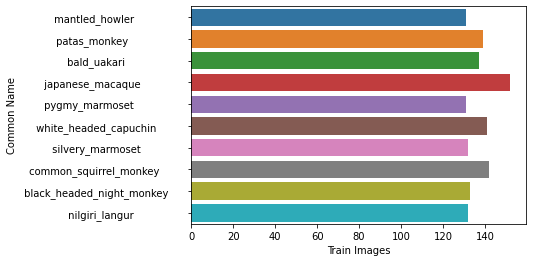

In [6]:
sns.barplot(x = df["Train Images"], y = df["Common Name"])
plt.show()

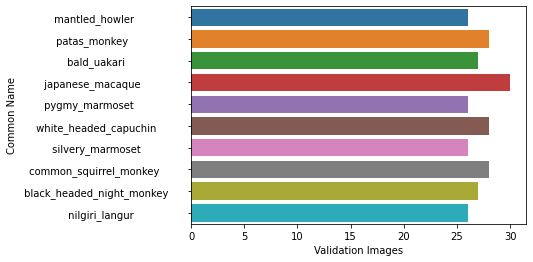

In [7]:
sns.barplot(x = df["Validation Images"], y = df["Common Name"])
plt.show()

We can load an image with kpi.load_image and convert to an array to test the render of image

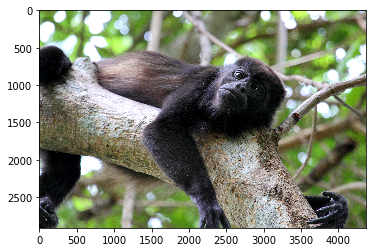

In [8]:
img = kpi.load_img(data_dir+'training/training/n0/n0021.jpg')
# Convert as array to show with pyplot
x = kpi.img_to_array(img)  
plt.imshow(x/255, interpolation='nearest')
plt.show()

## Model

In [36]:
generate_train_data = ImageDataGenerator(rescale=1./255)
train_generator = generate_train_data.flow_from_directory(data_dir+'/training/training',target_size=(60,60),batch_size=32,class_mode='categorical') 

generate_test_data = ImageDataGenerator(rescale=1./255)
test_generator = generate_test_data.flow_from_directory(data_dir+'/validation/validation',target_size=(60,60),batch_size=32,class_mode='categorical')

Found 895 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [38]:
model = km.Sequential()
model.add(kl.Conv2D(filters=32,kernel_size=(4,4),input_shape=(60,60,3),activation='relu'))
model.add(kl.MaxPool2D(pool_size=(2,2)))

model.add(kl.Conv2D(filters=32,kernel_size=(4,4),input_shape=(60,60,3),activation='relu'))
model.add(kl.MaxPool2D(pool_size=(2,2)))


model.add(kl.Flatten())

model.add(kl.Dense(128,activation='relu'))

model.add(kl.Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
ts = time.time()
model.fit_generator(train_generator, epochs = 10 , validation_data=train_generator,callbacks = early_stop,verbose = 1)
te = time.time()
t_learning_conv_simple_model = te-ts
print("Learning Time for %d epochs : %d seconds"%(epochs,t_learning_conv_simple_model))
model.save(data_dir+'model_monkey.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
28/28 [==============================] - 59s 2s/step - loss: 2.0769 - accuracy: 0.2078 - val_loss: 1.7806 - val_accuracy: 0.3888
Epoch 2/10
28/28 [==============================] - 58s 2s/step - loss: 1.6359 - accuracy: 0.4179 - val_loss: 1.4184 - val_accuracy: 0.4916
Epoch 3/10
28/28 [==============================] - 55s 2s/step - loss: 1.3754 - accuracy: 0.5207 - val_loss: 1.1857 - val_accuracy: 0.6034
Epoch 4/10
28/28 [==============================] - 56s 2s/step - loss: 1.1420 - accuracy: 0.6056 - val_loss: 0.9928 - val_accuracy: 0.6670
Epoch 5/10
28/28 [==============================] - 56s 2s/step - loss: 0.9889 - accuracy: 0.6670 - val_loss: 0.8514 - val_accuracy: 0.7274
Epoch 6/10
28/28 [==============================] - 56s 2s/step - loss: 0.8321 - accuracy: 0.7307 - val_loss: 0.7233 - val_accuracy: 0.7296
Epoch 7/10
28/28 [==============================] - 56s 2s/step - loss: 0.6799 - accuracy: 0.7709 - val_loss: 0.5583 - val_accuracy: 0.8190
Epoch 8/10
28/28 [==

In [41]:
loses=pd.DataFrame(model.history.history)
loses

loss  accuracy  val_loss  val_accuracy
0  2.076914  0.207821  1.780642      0.388827
1  1.635945  0.417877  1.418358      0.491620
2  1.375421  0.520670  1.185712      0.603352
3  1.142038  0.605587  0.992774      0.667039
4  0.988886  0.667039  0.851353      0.727374
5  0.832060  0.730726  0.723288      0.729609
6  0.679859  0.770950  0.558268      0.818994
7  0.569498  0.808939  0.434068      0.879330
8  0.450769  0.863687  0.329086      0.924022
9  0.335676  0.903911  0.385917      0.871508

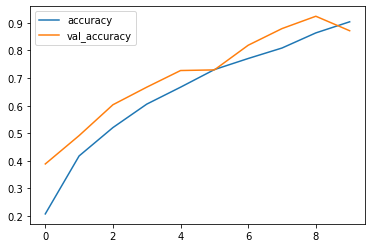

In [42]:
loses[['accuracy','val_accuracy']].plot()

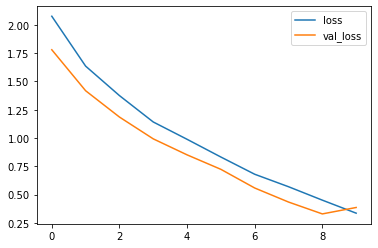

In [43]:
loses[['loss','val_loss']].plot()

In [74]:
# ts = time.time()
# score_conv_val = model.evaluate_generator(validation_generator, N_val / 32, verbose=1)
# score_conv_train = model.evaluate_generator(train_generator, N_train / 32, verbose=1)
# te = time.time()
# t_prediction_conv_simple_model = te-ts
# print('Train accuracy:', score_conv_train[1])
# print('Validation accuracy:', score_conv_val[1])
# print("Time Prediction: %.2f seconds" %t_prediction_conv_simple_model )

## Predictions

In [72]:
# data_dir_test = data_dir+'validation/validation'
# N_test = len(os.listdir(data_dir_test))

# test_datagen = kpi.ImageDataGenerator(rescale=1. / 255)

# test_generator = test_datagen.flow_from_directory(data_dir+'/validation/validation',target_size=(60,60),batch_size=32,class_mode='categorical')


# test_prediction = model.predict_generator(test_generator, N_test // 32)